# Pandas and Matplotlib

We will need two packages for the exercise, pandas and matplotlib.

Pandas lets you load and manipulate datasets, matplotlib lets you plot data.

## Let's start with Pandas

First, we have to import the package so we can use its functionality:

In [1]:
import pandas as pd

Now you can access pandas with 'pd'.

### Load data

As a first example we will load a dataset (csv) from a URL.

Loading datasets is done by one of the following functions:
- [pd.read_csv](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) function
- [pd.read_excel](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_excel.html) function
- for an overview see [https://pandas.pydata.org/pandas-docs/stable/io.html](https://pandas.pydata.org/pandas-docs/stable/io.html)

Loading a dataset from the filesystem is as easy as placing the corresponding file in the same directory as the notebook and give the filename as parameter:
```
pd.read_csv('myfile.csv')
```

This creates a so-called "dataframe". A dataframe is the type of object that represents your dataset in pandas.

In [2]:
tips_dataset = pd.read_csv('https://raw.githubusercontent.com/pandas-dev/pandas/master/doc/data/tips.csv')

### Viewing Data

If you want to see a few records of a dataset, you can use the head() function (shows the first few records) or the .tail() function (shows the last few records).
You can also specify how many records you want to see, i.e., head(20) will show the first 20 records.

In [3]:
tips_dataset.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


You might have noticed that the first column contains increasing numbers which are not contained in the loaded file. This is called the "index" and used for many operations provided by pandas. You can change this index, for example if your dataset contains unique IDs.

In [4]:
tips_dataset.index

RangeIndex(start=0, stop=244, step=1)

To get an overview of numeric data you can use the [describe()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) function.

In [5]:
tips_dataset.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


If you set the attribute ```include``` to ```'all'```, you can additionally get information about non-numerical columns.

In [6]:
tips_dataset.describe(include='all')

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


More powerful profiling functionality is provided by the [pandas-profiling](https://github.com/pandas-profiling/pandas-profiling) package, which generates a report for a given dataframe, that can be directly displayed in the Jupyter Notebook:

In [ ]:
!pip install -q -U pandas-profiling[notebook]
from pandas_profiling import ProfileReport

profile = ProfileReport(tips_dataset, title='Pandas Profiling Report')
profile.to_widgets()

### Sorting
The dataset can be sorted by the [sort_values(by='column')](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html) function.
This allows you to view different parts of your dataset with the head() function:

In [8]:
tips_dataset_sorted = tips_dataset.sort_values(by='total_bill')
tips_dataset_sorted.head(20)

,total_bill,tip,sex,smoker,day,time,size
67,3.07,1.00,Female,Yes,Sat,Dinner,1
92,5.75,1.00,Female,Yes,Fri,Dinner,2
111,7.25,1.00,Female,No,Sat,Dinner,1
172,7.25,5.15,Male,Yes,Sun,Dinner,2
149,7.51,2.00,Male,No,Thur,Lunch,2
195,7.56,1.44,Male,No,Thur,Lunch,2
218,7.74,1.44,Male,Yes,Sat,Dinner,2
145,8.35,1.50,Female,No,Thur,Lunch,2
135,8.51,1.25,Female,No,Thur,Lunch,2
126,8.52,1.48,Male,No,Thur,Lunch,2


### Projection

Projection can be done using the `[ ]` operator.
The following code creates a projection of a single column (= creates a new series that contains only the projected column):

In [9]:
tips_dataset_sorted['day'].head()

67      Sat
92      Fri
111     Sat
172     Sun
149    Thur
Name: day, dtype: object

Multiple columns can be projected by passing a list to the `[ ]` operator. 
In the following code line, the list is defined by `['day','total_bill']`.

In [10]:
tips_dataset_sorted[['day','total_bill']].head()

,day,total_bill
67,Sat,3.07
92,Fri,5.75
111,Sat,7.25
172,Sun,7.25
149,Thur,7.51


### Selection (Boolean Indexing / Filtering)

You can specify a condition on a column's values to select all records which match the condition.
Selection uses the same [ ] operator as projection, but has different content inside the brackets!

In [11]:
# take a look at the boolean filter
display((tips_dataset_sorted['total_bill'] > 10.0).head())

# filter dataframe using this filter
display(tips_dataset_sorted[tips_dataset_sorted['total_bill'] > 10.0].head())

# also possible to invert boolean filter to get all bills < 10.0
tips_dataset_sorted[~(tips_dataset_sorted['total_bill'] > 10.0)].head()

67     False
92     False
111    False
172    False
149    False
Name: total_bill, dtype: bool

,total_bill,tip,sex,smoker,day,time,size
235,10.07,1.25,Male,No,Sat,Dinner,2
82,10.07,1.83,Female,No,Thur,Lunch,1
226,10.09,2.00,Female,Yes,Fri,Lunch,2
10,10.27,1.71,Male,No,Sun,Dinner,2
51,10.29,2.60,Female,No,Sun,Dinner,2


,total_bill,tip,sex,smoker,day,time,size
67,3.07,1.00,Female,Yes,Sat,Dinner,1
92,5.75,1.00,Female,Yes,Fri,Dinner,2
111,7.25,1.00,Female,No,Sat,Dinner,1
172,7.25,5.15,Male,Yes,Sun,Dinner,2
149,7.51,2.00,Male,No,Thur,Lunch,2


### Aggregation

An aggregation groups the data by the values of a column, and then calculates an aggregation function for all values in a group.
You can group your data using the [groupby()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) function.

In [12]:
tips_dataset_sorted.groupby('day')

The result of the groupby function is an intermediate result containing the groups and all records in these groups.
You can use it to calculate an [aggregation function](https://pandas.pydata.org/pandas-docs/stable/reference/groupby.html) such as:
- sum()
- **mean()**
- std()
- min()
- max()

In [13]:
tips_dataset_sorted.groupby('day').mean()

,total_bill,tip,size
day,,,
Fri,17.151579,2.734737,2.105263
Sat,20.441379,2.993103,2.517241
Sun,21.410000,3.255132,2.842105
Thur,17.682742,2.771452,2.451613


In [14]:
tips_dataset_sorted.groupby('day').sum()

,total_bill,tip,size
day,,,
Fri,325.88,51.96,40
Sat,1778.40,260.40,219
Sun,1627.16,247.39,216
Thur,1096.33,171.83,152


Note that the index of your dataset (the first column) has changed and is now the value that was grouped by.

## How do I access the actual records?

Sometimes you might want to access the records in your dataframe individually. You can do this by calling the [itertuples()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.itertuples.html) function, which iterates over all records and returns them as tuples.
A tuple in python is a data structure that contains multiple values, and each of these values can be assigned to a separate variable in a for loop:


In [15]:
# get all tips which are greater than five
huge_tips = tips_dataset[tips_dataset['tip'] > 5]

# print a list of all columns in the dataframe
display(huge_tips.columns)

# iterate over all records as tuples using the itertuples() function
# note that the first value in the tuple is the index and not the first column!
for index, total_bill, tip, sex, smoker, day, time, size in huge_tips.itertuples():
    print("Record " + str(index) + " has total tip " + str(total_bill))

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

Record 23 has total tip 39.42
Record 44 has total tip 30.4
Record 47 has total tip 32.4
Record 52 has total tip 34.81
Record 59 has total tip 48.27
Record 85 has total tip 34.83
Record 88 has total tip 24.71
Record 116 has total tip 29.93
Record 141 has total tip 34.3
Record 155 has total tip 29.85
Record 170 has total tip 50.81
Record 172 has total tip 7.25
Record 181 has total tip 23.33
Record 183 has total tip 23.17
Record 211 has total tip 25.89
Record 212 has total tip 48.33
Record 214 has total tip 28.17
Record 239 has total tip 29.03


You can also achieve a similar result by using the [iterrows()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iterrows.html) function, which returns each row as an index/series pair and can then be accessed using projection:

In [16]:
for index, row in huge_tips.iterrows():
    print("Record " + str(index) + " has total tip " + str(row['total_bill']))

Record 23 has total tip 39.42
Record 44 has total tip 30.4
Record 47 has total tip 32.4
Record 52 has total tip 34.81
Record 59 has total tip 48.27
Record 85 has total tip 34.83
Record 88 has total tip 24.71
Record 116 has total tip 29.93
Record 141 has total tip 34.3
Record 155 has total tip 29.85
Record 170 has total tip 50.81
Record 172 has total tip 7.25
Record 181 has total tip 23.33
Record 183 has total tip 23.17
Record 211 has total tip 25.89
Record 212 has total tip 48.33
Record 214 has total tip 28.17
Record 239 has total tip 29.03


## Try it yourself
- Task 1.2.1: Load data and filter the examples
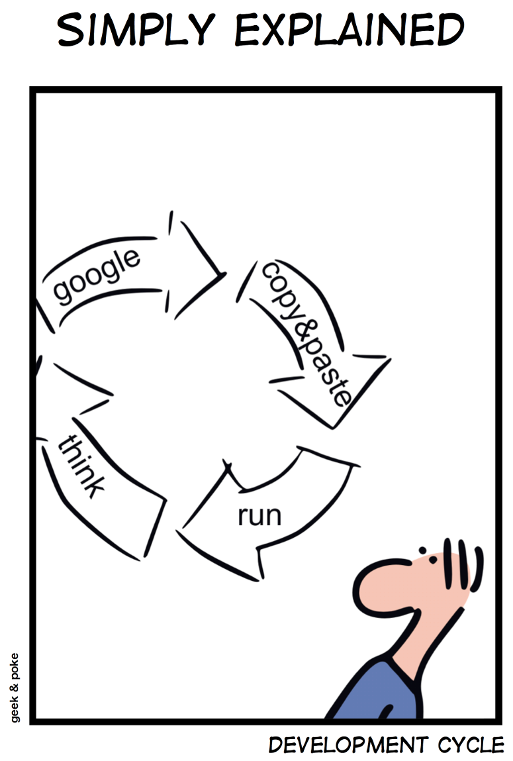
http://geek-and-poke.com/geekandpoke/2012/5/29/development-cycle.html

## Now let's have a look at plotting

The pandas dataframe object provides some simple built-in plotting functionality:

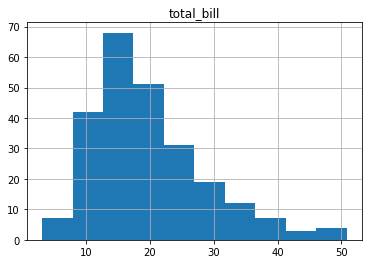

In [17]:
# to plot a histogram
tips_dataset.hist(column='total_bill');

Dataframe built-in plotting functionality is very limited. But it builds on another very popular python package for plotting that we can use for more sophisticated plots: [matplotlib](https://matplotlib.org/)



First, we have to import the right package again, so we can use its functionality:

In [18]:
import matplotlib.pyplot as plt

Afterwards, we can call functions on plt to [create plots](https://matplotlib.org/tutorials/index.html).
The actual drawing is only performed when you call the show() function afterwards!

Plotting methods allow for large variety of plot styles. A good overview is given in the [sample plots tutorial of matplotlib](https://matplotlib.org/tutorials/introductory/sample_plots.html). Plotting functions include:

- line() for line plots
- hist() for histograms
- bar() for bar charts
- pie() for pie charts
- scatter() for scatter plots
- and, of course, [xkcd-style sketch plots](https://matplotlib.org/gallery/showcase/xkcd.html)

Histograms can be created with the [hist()](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html) function:

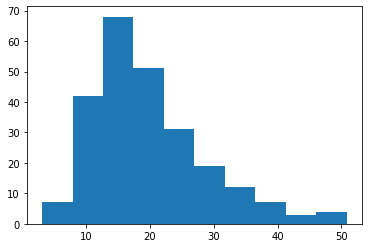

In [19]:
# plot a histogram
plt.hist(tips_dataset['total_bill'])
plt.show()

We can also combine multiple plots into a figure (using [```sub plots```](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html)), which makes it easier to compare them:

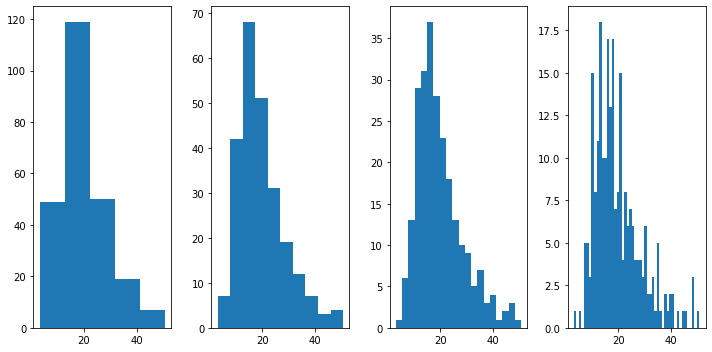

In [20]:
# define a figure with sub plots so we can compare different histograms
# the parameters are: number of rows, number of columns, share the y-axis, and the size of the figure
fig, axs = plt.subplots(1, 4, sharey=False, figsize=(10,5))

# plot a histogram with 5 bins in the first sub plot
axs[0].hist(tips_dataset['total_bill'], bins=5)
# plot a histogram with 10 bins in the second sub plot
axs[1].hist(tips_dataset['total_bill'], bins=10)
# plot a histogram with 20 bins in the third sub plot
axs[2].hist(tips_dataset['total_bill'], bins=20)
# plot a histogram with 50 bins in the fourth sub plot
axs[3].hist(tips_dataset['total_bill'], bins=50)

# use this call to prevent the subplots from overlapping
plt.tight_layout()
# show the figure
plt.show()

Alternatively, we can plot multiple times into the same figure. Each time we plot this will create a series with a new colour:

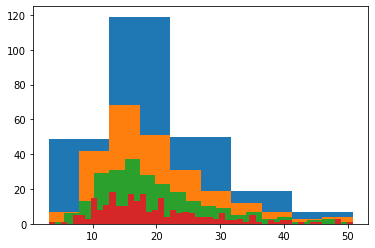

In [21]:
# plot a histogram with 5 bins
plt.hist(tips_dataset['total_bill'], bins=5)

# plot a histogram with 10 bins
plt.hist(tips_dataset['total_bill'], bins=10)

# plot a histogram with 20 bins
plt.hist(tips_dataset['total_bill'], bins=20)

# plot a histogram with 50 bins
plt.hist(tips_dataset['total_bill'], bins=50)

# show the figure
plt.show()

Scatter plots are created with the [scatter()](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html) function:

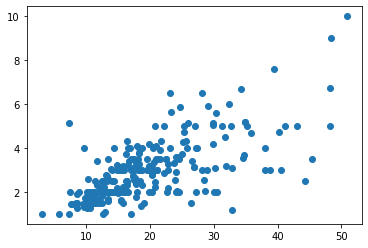

In [22]:
# create a scatter plot with the total_bill column on the x-axis and the tip column on the y-axis
plt.scatter(tips_dataset['total_bill'], tips_dataset['tip'])

# show the plot
plt.show()

The function [annotate()](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.annotate.html) allows you to add labels to the data points. 
In the following example, we first select all tips greater than five, and then create a scatter plot that annotates every data point with the corresponding weekday.

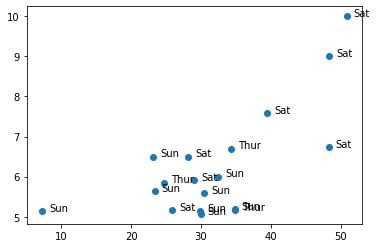

In [23]:
# get all tips which are greater than five
huge_tips = tips_dataset[tips_dataset['tip'] > 5]
# create a scatter plot using total_bill and tip
plt.scatter(huge_tips['total_bill'], huge_tips['tip'])

# iterate over all records using the itertuples() function
for index, total_bill, tip, sex, smoker, day, time, size in huge_tips.itertuples():
    # call annotate() for each record
    plt.annotate(
        day, # text to print
        (total_bill+1, tip) # position in (x, y); add 1 to move the text away from the point
    )
    
# show the plot
plt.show()

To plot different series based on data values, we can first group the data and then create a plot for each:

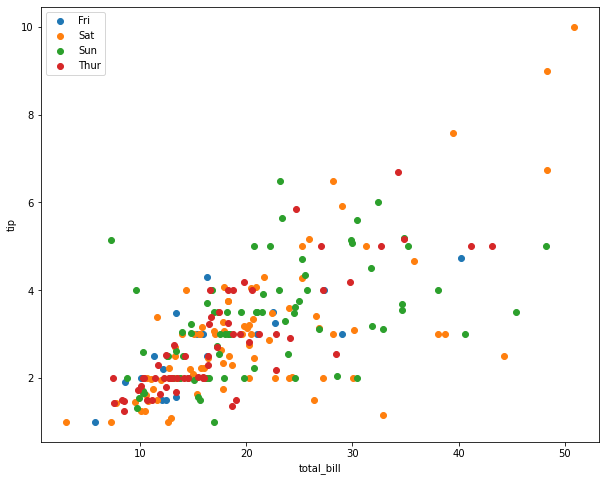

In [24]:
# specify the size of the figure
plt.figure(figsize=(10,8))

# group by day and iterate over all groups
for name, group in tips_dataset.groupby('day'):
    # create one scatter plot per group
    plt.scatter(group['total_bill'], group['tip'], label=name)

# add the axis labels
plt.xlabel("total_bill")
plt.ylabel("tip")
# add a legend
plt.legend()
# show the plot
plt.show()